# Logistic Regression Classification - TI-02

### Yogie Wisesa
### 1806148851

Pada notebook ini akan dilakukan percobaan klasifikasi menggunakan algoritma Logistic regression\
Rasio training dan test data pada percobaan ini adalah 70/30\
Training menggunakan 35 data pertama dari setiap kelas dengan total 105 data\
Testing menggunakan 15 data terakhir dari setiap kelas dengan total 45 data\
Percobaan dilakukan sebanyak tiga kali untuk tiga variasi hyperparameter berbeda. 

### 1. Import library dan deklarasi variabel fungsi yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder as le

### 2. Import dataset iris menjadi variabel dataframe (df)

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### 3. Hapus kolom id karena tidak akan diperlukan

In [3]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### 4. Konfirmasi jumlah data dan menampilkan statistik data

In [4]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5. Verifikasi jumlah data untuk setiap spesies

In [5]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### 6. Mencari apakah ada kolom yang kosong, jika ada yang kosong maka kita perlu melengkapinya

In [6]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### 7. Plotting data untuk melihat persebaran data

In [7]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

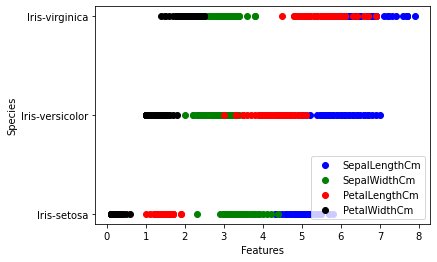

In [8]:
plt.xlabel('Features')
plt.ylabel('Species')

pltX = df.loc[:, 'SepalLengthCm']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'blue', label = 'SepalLengthCm')

pltX = df.loc[:, 'SepalWidthCm']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'green', label = 'SepalWidthCm')

pltX = df.loc[:, 'PetalLengthCm']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'red', label = 'PetalLengthCm')

pltX = df.loc[:, 'PetalWidthCm']
pltY = df.loc[:, 'Species']
plt.scatter(pltX, pltY, color = 'black', label = 'PetalWidthCm')

plt.legend()
plt.show()

### 8. Transformasikan data species menjadi angka agar mudah diproses

In [9]:
df['Species'] = le.fit_transform(df['Species'], df['Species'])
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 9. Split data sesuai permintaan.
Dengan melakukan split data ini maka rasio training dan test akan otomatis menjadi 70:30 karena jumlah datanya 105:45

In [10]:

x_train = df.loc[np.r_[0:35, 50:85, 100:135], ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_train = df.loc[np.r_[0:35, 50:85, 100:135], ['Species']]
                   
x_test = df.loc[np.r_[35:50, 85:100, 135:150], ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y_test = df.loc[np.r_[35:50, 85:100, 135:150], ['Species']]


### 10. Lakukan percobaan
#### Percobaan 1: hyperparameter default

In [11]:
model = LogisticRegression()
model.fit(x_train, y_train.values.ravel())

LogisticRegression()

In [12]:
print("Accuracy: ",model.score(x_train, y_train) * 100)
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  97.14285714285714
Accuracy:  100.0


#### Percobaan 2: menggunakan param solver liblinear dan random state = 42

In [13]:
model2 = LogisticRegression(solver = 'liblinear', random_state = 42)
model2.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42, solver='liblinear')

In [14]:
y_pred = model2.predict(x_test)
print('Accuracy score training data 2: ', accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy score training data 2:  0.9777777777777777


#### Percobaan 3: menggunakan param class weight = balanced

In [15]:
model3 = LogisticRegression(class_weight = 'balanced')
model3.fit(x_train, y_train.values.ravel())

LogisticRegression(class_weight='balanced')

In [16]:
y_pred = model3.predict(x_test)
print('Accuracy score training data 3: ', accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy score training data 3:  1.0


## Kesimpulan
Penggunaan logistic regression untuk klasifikasi dataset bunga iris dapat dibilang cukup baik karena akurasi yang didapat seluruhnya di atas 97%.\
meskipun dilakukan penggantian parameter akurasi tidak jauh berbeda karena jumlah data yang tidak terlalu banyak sehingga tidak terlalu berpengaruh.